<a href="https://colab.research.google.com/github/ShinwooChoi/ESAA-OB/blob/main/11_28_ESAA_OB_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<딥러닝 파이토치 교과서> ​7장 p.360-371

## 7.1 시계열 문제
시계열 분석은 시간에 따라 변하는 데이터를 사용하여 추세를 분석하는 것. 미래 예측을 위해 시계열 데이터를 사용함.

- 시계열 형태  
  - 불규칙 변동: 전쟁, 홍수, 화재처럼 예측 불가능하게 발생  
  - 추세 변동: 장기적인 증가/감소 또는 일정 상태 유지  
  - 순환 변동: 2~3년 정도 주기로 반복되는 경제적 변동  
  - 계절 변동: 1년 주기의 규칙적 변동

→ 시계열 데이터는 규칙적/불규칙적 시계열로 나눌 수 있음.  
→ 전통적 모델: AR, MA, ARMA, ARIMA  
→ 최근: 딥러닝 기반 모델이 좋은 성능을 보임.



## 7.2 AR, MA, ARMA, ARIMA

시계열 분석은 독립 변수를 시간으로 사용.  
일반 회귀 모델과 달리 시간의 흐름이 독립 변수 역할을 함.



### 7.2.1 AR 모델
이전 관측 값이 이후 관측 값에 영향을 준다는 자기 회귀 모델.

- 수식:  
  Zₜ = φ₁Zₜ₋₁ + φ₂Zₜ₋₂ + ... + φₚZₜ₋ₚ + aₜ  
  ① 현재 시점  
  ② 과거 데이터가 현재에 미치는 영향  
  ③ 오차항(백색 잡음)



### 7.2.2 MA 모델
이동 평균 모델.  
시계열의 변화를 과거 오차의 이동 평균으로 설명함.

- 수식:  
  Zₜ = θ₁aₜ₋₁ + θ₂aₜ₋₂ + ... + θ_q aₜ₋q + aₜ  
  ① 현재 데이터  
  ② 과거 오차의 영향  
  ③ 현재 오차



### 7.2.3 ARMA 모델
AR + MA 모델을 결합한 형태.  
과거 관측 값과 과거 오차를 모두 사용.

- 수식:  
  Zₜ = a + φ₁Zₜ₋₁ + ... + φₚZₜ₋ₚ + θ₁aₜ₋₁ + ... + θ_q aₜ₋q + aₜ



### 7.2.4 ARIMA 모델
ARMA + 차분(differencing)을 포함한 모델.

- 파라미터  
  - p: 자기 회귀 차수  
  - d: 차분 차수  
  - q: 이동 평균 차수

statsmodels 라이브러리를 이용해 구현:  
- ARIMA(p,d,q) 사용  
- fit() 으로 모델 학습  
- predict() 로 미래 예측

예제에서 ARIMA(5,1,0)을 사용함.  
오차 분포와 밀도 그래프를 통해 오차가 치우쳐 있는지 확인함.

두 번째 단계에서는 test 데이터를 반복적으로 예측하며 MSE 계산.  
예측 결과와 실제 데이터를 비교하여 추세 파악 가능.



## 7.3 순환 신경망(RNN)
- 시간적으로 연속된 데이터를 처리하기 위한 인공 신경망.
- ‘Recurrent’는 현재 은닉층에 이전 은닉층 정보가 반복적으로 전달됨을 의미.
- RNN의 핵심은 ‘기억(memory)’으로, 입력 시퀀스를 순차적으로 처리하며 새로운 입력이 들어올 때마다 이전 상태를 기반으로 정보가 갱신됨.

### 7.3.1 RNN 계층과 셀
- RNN은 ‘RNN 계층(layer)’과 ‘RNN 셀(cell)’로 구성됨.
- RNN 계층은 전체 시퀀스를 한 번에 처리하지만, RNN 셀은 단일 time step만 처리하며 반복 구조로 전체 시퀀스를 순회.
- 입력 x₁, x₂, …, xₙ과 은닉 상태 h₀, h₁, …, hₙ을 이용해 단계별로 출력 y₁, y₂, …, yₙ이 생성됨.
- PyTorch의 주요 RNN 셀 종류:
  - nn.RNNCell : 기본 RNN 셀
  - nn.GRUCell : 게이트가 추가된 GRU 셀
  - nn.LSTMCell : 장기 의존성 처리를 위한 LSTM 셀
- RNN은 자연어 처리, 음성 인식, 감성 분석 등 시계열·순차 데이터 처리에 널리 사용됨.

### RNN 구조 예시
- 순환 구조: 입력이 들어올 때마다 기존 기억(hₜ₋₁)과 새로운 입력(xₜ)을 결합해 hₜ 생성.
- 입력 길이가 길어도 동일한 과정이 반복됨.
- 입력·출력 구성 형태에 따라 모델 유형이 분류됨.

### RNN의 입·출력 구조 유형
1. **일대일**: 단일 입력 → 단일 출력. 순환 구조가 없어 일반 신경망처럼 사용됨.
2. **일대다**: 하나의 입력 → 여러 출력. 예: 이미지 캡셔닝.
3. **다대일**: 여러 입력 → 단일 출력. 예: 문장의 긍/부정 분류.
4. **다대다**: 여러 입력 → 여러 출력. 예: 번역기(Seq2Seq 구조).

### Seq2Seq 구조 개요
- 인코더와 디코더로 구성된 다대다 모델.
- 인코더: 입력 시퀀스를 RNN(LSTM/GRU)으로 처리해 문맥 벡터 생성.
- 디코더: 해당 문맥 벡터를 기반으로 다음 단어를 순차적으로 생성.
- PyTorch 구현 예:
  - 인코더/디코더 모두 Embedding + LSTM + Dropout 사용.
  - 디코더 출력은 Linear 층을 통해 단어 확률로 변환.

### 동기화 다대다
- 입력과 출력의 길이를 시간축 기준으로 맞춘 다대다 구조.
- 예: 프레임 단위 비디오 분류 등.

### RNN 셀 동작
- 각 time step에서 셀은 입력 xₜ와 이전 상태 hₜ₋₁를 받아 새로운 hₜ를 계산.
- 이 hₜ는 다음 step의 입력으로 전달되며 필요한 경우 yₜ로 출력됨.



7-1 ARIMA() 함수를 호출하여 sales 데이터셋에 대한 예측


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a 

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Fri, 28 Nov 2025   AIC                            411.302
Time:                        08:53:21   BIC                            420.634
Sample:                             0   HQIC                           414.523
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

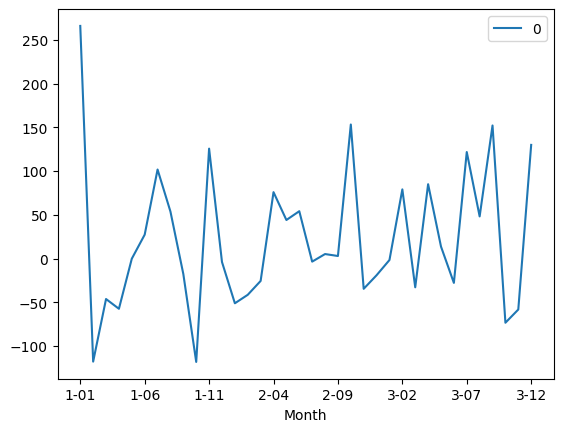

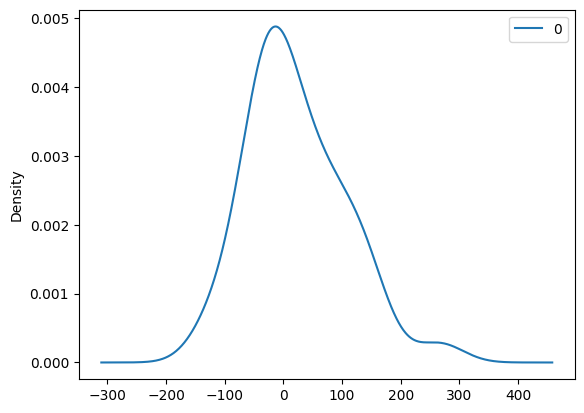

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [2]:
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

series=read_csv('sales.csv', header=0, parse_dates=[0], index_col=0, date_format=parser)
model=ARIMA(series, order=(5,1,0))
model_fit=model.fit()
print(model_fit.summary())
residuals=DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

7-2 statsmodels 라이브러리를 이용한 sales 데이터셋 예측

/tmp/ipython-input-1640656882.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series=read_csv('sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
/tmp/ipython-input-1640656882.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070407, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690699, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916191, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.818


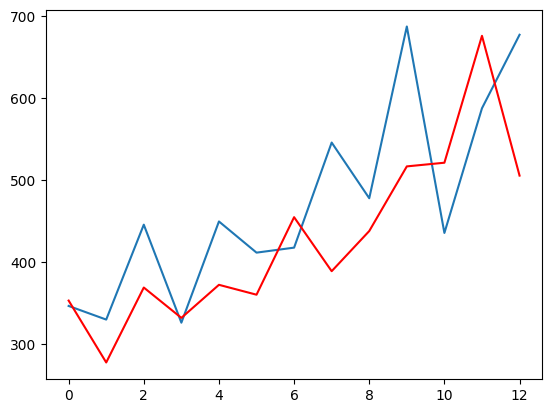

In [3]:
import numpy as np
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

series=read_csv('sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

X=series.values
X=np.nan_to_num(X)
size=int(len(X) * 0.66)
train, test=X[0:size], X[size:len(X)]
history=[x for x in train]
predictions=list()
for t in range(len(test)):
    model=ARIMA(history, order=(5,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error=mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()